# PCA 主成分分析

### 次元削減をすることで多次元のデータをわかりやすく可視化したり，学習を高速化することが可能となる

## PCA from scrach

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
#　サンプルデータ準備
x = np.array([3, 4, 2, 3, 4, 4, 3])
y = np.array([2, 3, 5, 5, 3, 2, 3])
X = pd.DataFrame({'x': x, 'y': y})
X

,x,y
0,3,2
1,4,3
2,2,5
3,3,5
4,4,3
5,4,2
6,3,3


In [7]:
def my_pca(X, num_components):
    # 標準化
    X_meaned = X - np.mean(X, axis=0)
    X_scaled = X_meaned / np.std(X_meaned, axis=0)
    
    # 分散共分散行列
    cov_mat = np.cov(X_scaled, rowvar=False)
    
    # 固有ベクトルと固有値
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_evalues = eigen_values[sorted_index]
    sorted_evectors = eigen_vectors[:, sorted_index]
    subset_evectors = sorted_evectors[:, :num_components]
    
    # 変換
    X_reduced = np.dot(X_scaled, subset_evectors)
    
    return X_reduced

In [8]:
my_pca(X, 1)

array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

# sklearnのPCA

In [9]:
# インスタンス生成
scaler = StandardScaler()
pca = PCA(n_components=1)
# Xの主成分を計算し、主成分の座標系に変換
X = scaler.fit_transform(X)
pca.fit_transform(X)

array([[-0.49467432],
       [-0.89576549],
       [ 2.34350404],
       [ 1.33314107],
       [-0.89576549],
       [-1.50503729],
       [ 0.11459748]])

In [10]:
# データ準備 
df = sns.load_dataset('iris')
y_col = 'species'
X = df.loc[:, df.columns!=y_col]
y = df[y_col].values
# 標準化
X_scaled = StandardScaler().fit_transform(X)
# PCA　２次元に圧縮
X_pc = PCA(n_components=2).fit_transform(X)

<AxesSubplot:xlabel='first component', ylabel='second component'>

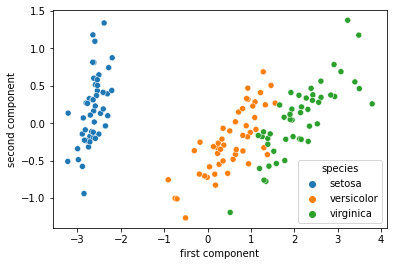

In [11]:
y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis=1), columns=['first component', 'second component', 'species'])
sns.scatterplot(x='first component', y='second component', hue='species', data=df_pc)

# 累積寄与率

In [12]:
n_components=4
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=4)

In [13]:
#　第一主成分でデータを約73%説明している　　第三、第四主成分は寄与率ほぼなし
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [14]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

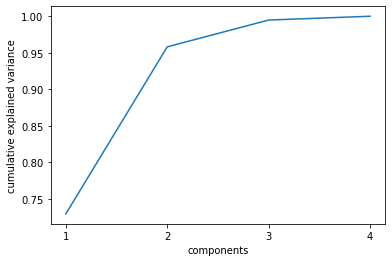

In [15]:
# 可視化
# 累積してくれる関数cumsum
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, n_components+1))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')
plt.show()

# PCAを使用して分類器を作成

## PCA on MNIST

In [16]:
mnist = fetch_openml('mnist_784')

In [18]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [19]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
mnist.data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [21]:
mnist.data.max(axis=1)

0        255.0
1        255.0
2        255.0
3        255.0
4        255.0
         ...  
69995    255.0
69996    254.0
69997    255.0
69998    255.0
69999    254.0
Length: 70000, dtype: float64

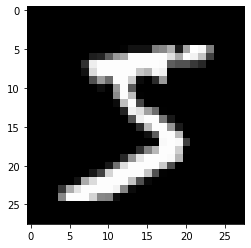

In [22]:
# MNISTデータの画像構成
im = mnist.data.iloc[0].values.reshape(28, 28)
plt.imshow(im, 'gray')

In [24]:
# hold-out
# 学習データを7:3に分割
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# 累積寄与率95%になるようにPCAする
pca = PCA(n_components=0.95).fit(X_train)

In [33]:
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

In [34]:
print(f"{X_train.shape[-1]} dimensions is reduced to {X_train_pc.shape[-1]} dimension by PCA")

784 dimensions is reduced to 323 dimension by PCA


In [36]:
# 主成分を特徴量にロジスティック回帰で分類器を構築
# PCAあり
model_pca = LogisticRegression()
before = time.time()
model_pca.fit(X_train_pc, y_train)
after = time.time()
print(f"fit took {after-before:.2f}s")

fit took 4.04s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
y_pred_pc = model_pca.predict(X_test_pc)

In [44]:
accuracy_score(y_test, y_pred_pc)

0.9195238095238095

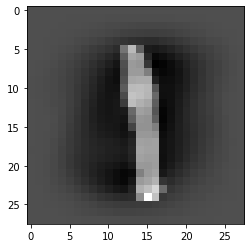

In [40]:
index = 2
im = X_test[index].reshape(28, 28)
plt.imshow(im, 'gray')

In [45]:
# PCAなし
model = LogisticRegression()
before = time.time()
model.fit(X_train, y_train)
after = time.time()
print(f"fit took {after-before:.2f}s")

fit took 8.89s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.910047619047619